# Welcome to the Machine learning notebook for the Plastic Scanner
Latest version can be found here:
https://colab.research.google.com/drive/1wfOuVHbrcoFD7YLNErialoZrMzzZKGtq#scrollTo=cFfrZTDJPiYh

this file is based on:
https://colab.research.google.com/github/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/arduino_tinyml_workshop.ipynb


##Variables

In [44]:
URL = "https://raw.githubusercontent.com/Plastic-Scanner/data/main/data/20240126_LasercutPlastic/measurement.csv"
TooBright = 1.5
TooDark = 0.5
scaler = 1000000

##Setup

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

##Preprocess

In [46]:
df = pd.read_csv(URL)
#df = df_raw.loc[:, :'nm1720'] #drop all later columns
df

,Reading,Name,PlasticType,Color,MeasurementType,DateTime,nm940,nm1050,nm1200,nm1300,...,nm1650_snv,nm1720_snv,nm940_snvScaled,nm1050_snvScaled,nm1200_snvScaled,nm1300_snvScaled,nm1450_snvScaled,nm1550_snvScaled,nm1650_snvScaled,nm1720_snvScaled
0,1,NaN,calibration,white,calibration,"January 24, 2024 at 11:45AM",578432.0,848445.0,1555265.0,1549915.0,...,1046852.00,1692303.37,192523.250,348098.500,453303.684,504826.756,495388.018,457960.882,709370.400,838460.674
1,2,NaN,calibration,white,calibration,"January 24, 2024 at 11:45AM",579549.0,848677.0,1555286.0,1549376.0,...,-1430842.87,-1692741.87,672859.512,612116.324,636686.500,630827.824,572408.062,499828.248,213831.426,161451.626
2,3,NaN,pet,transparent,NaN,"January 24, 2024 at 11:45AM",670873.5,991415.5,1590252.5,1755639.5,...,-1105078.25,-1729615.62,691564.912,703958.626,518018.594,659468.388,436055.412,557872.962,278984.350,154076.876
3,4,NaN,pet,transparent,NaN,"January 24, 2024 at 11:45AM",680057.5,996756.5,1582503.5,1760488.5,...,-1116948.25,-1708148.37,702300.888,702455.850,506634.890,655020.600,438492.962,560114.150,276610.350,158370.326
4,5,NaN,pet,transparent,NaN,"January 24, 2024 at 11:46AM",673099.0,990860.0,1574496.0,1744121.0,...,-1101170.25,-1733003.87,698537.174,705155.400,507769.028,652173.400,443993.944,559205.662,279765.950,153399.226
5,6,NaN,pet,transparent,NaN,"January 24, 2024 at 11:46AM",674398.0,994829.0,1584583.0,1747887.0,...,-1101663.75,-1734193.12,699236.538,708874.774,515439.794,653501.012,450434.284,539685.424,279667.250,153161.376
6,7,NaN,pet,transparent,NaN,"January 24, 2024 at 11:46AM",647714.5,936667.5,1645482.5,1693558.5,...,-1097571.62,-1907254.37,684911.438,653991.138,559431.050,632401.212,485745.010,584485.700,280485.676,118549.126
7,8,NaN,pet,transparent,NaN,"January 24, 2024 at 11:46AM",636991.0,931009.0,1642795.0,1686228.0,...,-1123256.62,-1917301.00,661961.788,655657.050,570084.388,637828.788,492755.736,589823.494,275348.676,116539.800
8,9,NaN,pet,transparent,NaN,"January 24, 2024 at 11:46AM",683119.5,996839.5,1587266.5,1766967.5,...,-1124225.62,-1700404.37,706201.600,699926.538,509554.006,657981.100,439897.800,551364.910,275154.876,159919.126
9,10,NaN,pet,transparent,NaN,"January 24, 2024 at 11:46AM",672941.0,990237.0,1570354.0,1749850.0,...,-1093217.75,-1734542.50,697918.750,704003.212,502361.650,656246.088,444938.150,560084.494,281356.450,153091.500


In [47]:
#make a new dataframe with only the ones that have MeasurementType as "calibration" or PlasticType as "reference"
df_ref = df[(df['MeasurementType'] == 'calibration')]
df_ref

,Reading,Name,PlasticType,Color,MeasurementType,DateTime,nm940,nm1050,nm1200,nm1300,...,nm1650_snv,nm1720_snv,nm940_snvScaled,nm1050_snvScaled,nm1200_snvScaled,nm1300_snvScaled,nm1450_snvScaled,nm1550_snvScaled,nm1650_snvScaled,nm1720_snvScaled
0,1,NaN,calibration,white,calibration,"January 24, 2024 at 11:45AM",578432.0,848445.0,1555265.0,1549915.0,...,1046852.00,1692303.37,192523.250,348098.500,453303.684,504826.756,495388.018,457960.882,709370.400,838460.674
1,2,NaN,calibration,white,calibration,"January 24, 2024 at 11:45AM",579549.0,848677.0,1555286.0,1549376.0,...,-1430842.87,-1692741.87,672859.512,612116.324,636686.500,630827.824,572408.062,499828.248,213831.426,161451.626
48,49,NaN,calibration,white,calibration,"January 24, 2024 at 11:53AM",580925.0,852849.0,1561394.0,1554996.0,...,-1502947.12,-1246614.62,580661.038,745213.824,682409.976,646842.950,462882.482,431925.668,199410.576,250677.076
49,50,NaN,calibration,white,calibration,"January 24, 2024 at 11:53AM",580942.5,852707.5,1560940.5,1554891.5,...,-1566530.12,-1280019.37,599454.706,731317.250,663940.250,650920.662,474754.256,448896.140,186693.976,243996.126


In [48]:
PLASTICTYPES = df['PlasticType'].unique()
print(PLASTICTYPES)

['calibration' 'pet' 'pmma' 'pc' 'ps' 'other']


In [49]:
#plastics_to_train = ['calibration','pet', 'hdpe','pp','ps']
#df['PlasticType'] = df['PlasticType'].apply(lambda x: x if x in plastics_to_train else 'other')

In [50]:
PLASTICTYPES = df['PlasticType'].unique()
print(PLASTICTYPES)

['calibration' 'pet' 'pmma' 'pc' 'ps' 'other']


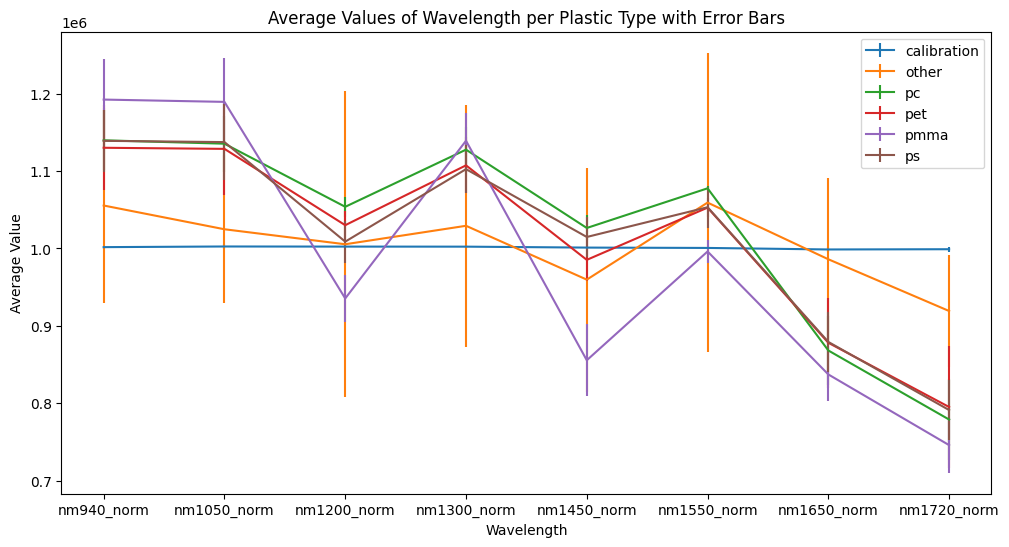

In [51]:
# Group the data by "PlasticType" and calculate the mean and standard deviation of the specified columns
df_mean = df.groupby("PlasticType")[["nm940_norm", "nm1050_norm", "nm1200_norm", "nm1300_norm", "nm1450_norm", "nm1550_norm", "nm1650_norm", "nm1720_norm"]].mean()
df_std = df.groupby("PlasticType")[["nm940_norm", "nm1050_norm", "nm1200_norm", "nm1300_norm", "nm1450_norm", "nm1550_norm", "nm1650_norm", "nm1720_norm"]].std()

# Plot the average values for each plastic type with error bars
x = np.arange(len(df_mean.columns))
plt.figure(figsize=(12, 6))
for i, plastic_type in enumerate(df_mean.index):
    y = df_mean.loc[plastic_type].values
    error = df_std.loc[plastic_type].values
    plt.errorbar(x, y, yerr=error, label=plastic_type)

plt.xticks(x, df_mean.columns)
plt.xlabel("Wavelength")
plt.ylabel("Average Value")
plt.title("Average Values of Wavelength per Plastic Type with Error Bars")
plt.legend(loc="upper right")
plt.show()

In [52]:
df.loc[:, 'nm940_norm':'nm1720_snvScaled'] = df.loc[:, 'nm940_norm':'nm1720_snvScaled'] / scaler

In [53]:
# go through the df_norm dataframe and delete all the rows that have a value that is smaller than "TooDark"value in the column "nm940" and bigger than "TooBright" value in the column "nm940"
df = df[(df['nm940_norm'] < TooBright) & (df['nm940_norm'] > TooDark)]

In [54]:
df = df[df['MeasurementType'] != 'calibration']

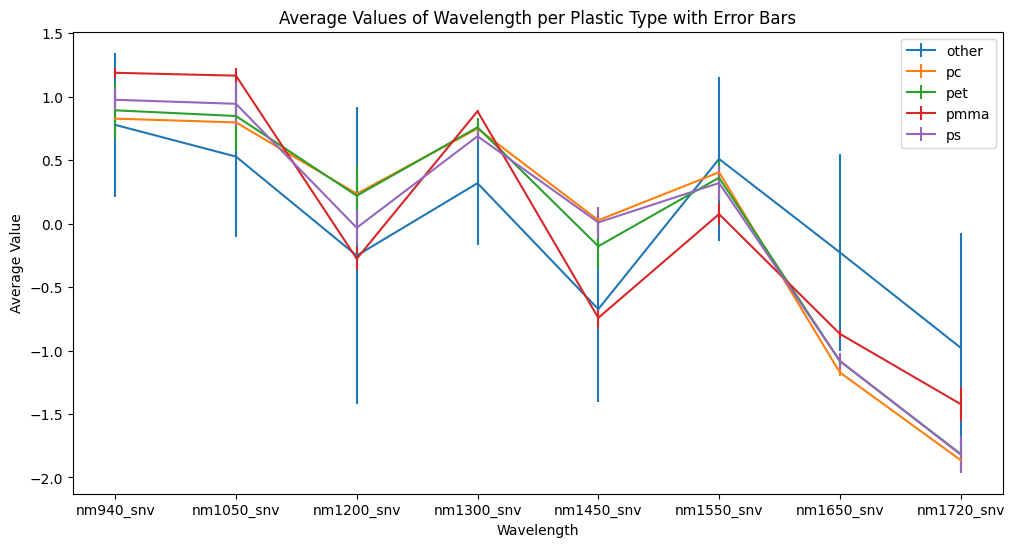

In [55]:
# Group the data by "PlasticType" and calculate the mean and standard deviation of the specified columns
df_mean = df.groupby("PlasticType")[["nm940_snv", "nm1050_snv", "nm1200_snv", "nm1300_snv", "nm1450_snv", "nm1550_snv", "nm1650_snv", "nm1720_snv"]].mean()
df_std = df.groupby("PlasticType")[["nm940_snv", "nm1050_snv", "nm1200_snv", "nm1300_snv", "nm1450_snv", "nm1550_snv", "nm1650_snv", "nm1720_snv"]].std()

# Plot the average values for each plastic type with error bars
x = np.arange(len(df_mean.columns))
plt.figure(figsize=(12, 6))
for i, plastic_type in enumerate(df_mean.index):
    y = df_mean.loc[plastic_type].values
    error = df_std.loc[plastic_type].values
    plt.errorbar(x, y, yerr=error, label=plastic_type)

plt.xticks(x, df_mean.columns)
plt.xlabel("Wavelength")
plt.ylabel("Average Value")
plt.title("Average Values of Wavelength per Plastic Type with Error Bars")
plt.legend(loc="upper right")
plt.show()

In [56]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load your dataset here (replace 'your_dataset.csv' with your actual dataset file)
data = df

# Assuming 'material_type' is the column that indicates the material type
X = data.drop(df.columns[0:6], axis=1)
y = data['PlasticType']

# Initialize SMOTE with the desired number of samples for each class (e.g., 100)
desired_samples = 25
smote = SMOTE(sampling_strategy={material_type: desired_samples for material_type in y.unique()})

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

# Now you can use X_resampled and y_resampled as your balanced dataset

# Create a new DataFrame with the resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['PlasticType'] = y_resampled

# Save the resampled data to a CSV file
#resampled_data.to_csv('test_resampled.csv', index=False)


Class distribution after SMOTE: Counter({'pet': 25, 'pmma': 25, 'pc': 25, 'ps': 25, 'other': 25})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (25) in class pet will be larger than the number of samples in the majority class (class #other -> 10)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (25) in class pmma will be larger than the number of samples in the majority class (class #other -> 10)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (25) in class pc will be larger than the number of samples in the majority class (class #other -> 10)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (25) in class ps will be larger than the number of samples in the majority class (class #other -> 10)
  warnings.war

In [57]:
df = resampled_data

##Train neural network

In [58]:
print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
PLASTICTYPES = df['PlasticType'].unique()
NUM_PLASTICTYPES = len(df['PlasticType'].unique())
print(PLASTICTYPES)

# Create empty NumPy arrays
outputs = []
inputs = []

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_PLASTICS = np.eye(NUM_PLASTICTYPES)
# Iterate over the DataFrame
for row in df.itertuples():
    #Add the value in the 'PlasticType' column to the outputs array
    #outputs = ONE_HOT_ENCODED_GESTURES[]
    for i in range(NUM_PLASTICTYPES):
      #if PLASTICTYPES[i] == row[3]:
      if PLASTICTYPES[i] == row[33]:
        output = ONE_HOT_ENCODED_PLASTICS[i]
    outputs.append(output)
    # Create an array of the values from the column 'nm940' till 'nm1720'
    #input_array = row[7:15]
    input_array = row[25:33]
    #print(row[25:33])
    # Add the array to the input array
    inputs.append(input_array)

print('outputs:', len(outputs))
print('inputs:', len(inputs))
inputs = np.array(inputs)
outputs = np.array(outputs)
print("Data set parsing and preparation complete.")

TensorFlow version = 2.15.0

['pet' 'pmma' 'pc' 'ps' 'other']
outputs: 125
inputs: 125
Data set parsing and preparation complete.


In [59]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.70 * num_inputs)
TEST_SPLIT = int(0.20 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [60]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(64, activation='relu')) # relu is used for performance
#model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_PLASTICTYPES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=300, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/300
87/87 [==============================] - 1s 4ms/step - loss: 0.1585 - mae: 0.3175 - val_loss: 0.1661 - val_mae: 0.3248
Epoch 2/300
87/87 [==============================] - 0s 2ms/step - loss: 0.1558 - mae: 0.3143 - val_loss: 0.1677 - val_mae: 0.3261
Epoch 3/300
87/87 [==============================] - 0s 2ms/step - loss: 0.1536 - mae: 0.3111 - val_loss: 0.1656 - val_mae: 0.3241
Epoch 4/300
87/87 [==============================] - 0s 2ms/step - loss: 0.1513 - mae: 0.3088 - val_loss: 0.1648 - val_mae: 0.3233
Epoch 5/300
87/87 [==============================] - 0s 2ms/step - loss: 0.1485 - mae: 0.3055 - val_loss: 0.1638 - val_mae: 0.3218
Epoch 6/300
87/87 [==============================] - 0s 2ms/step - loss: 0.1443 - mae: 0.3006 - val_loss: 0.1648 - val_mae: 0.3212
Epoch 7/300
87/87 [==============================] - 0s 3ms/step - loss: 0.1389 - mae: 0.2911 - val_loss: 0.1574 - val_mae: 0.3150
Epoch 8/300
87/87 [==============================] - 0s 2ms/step - loss: 0.1354 - m

## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

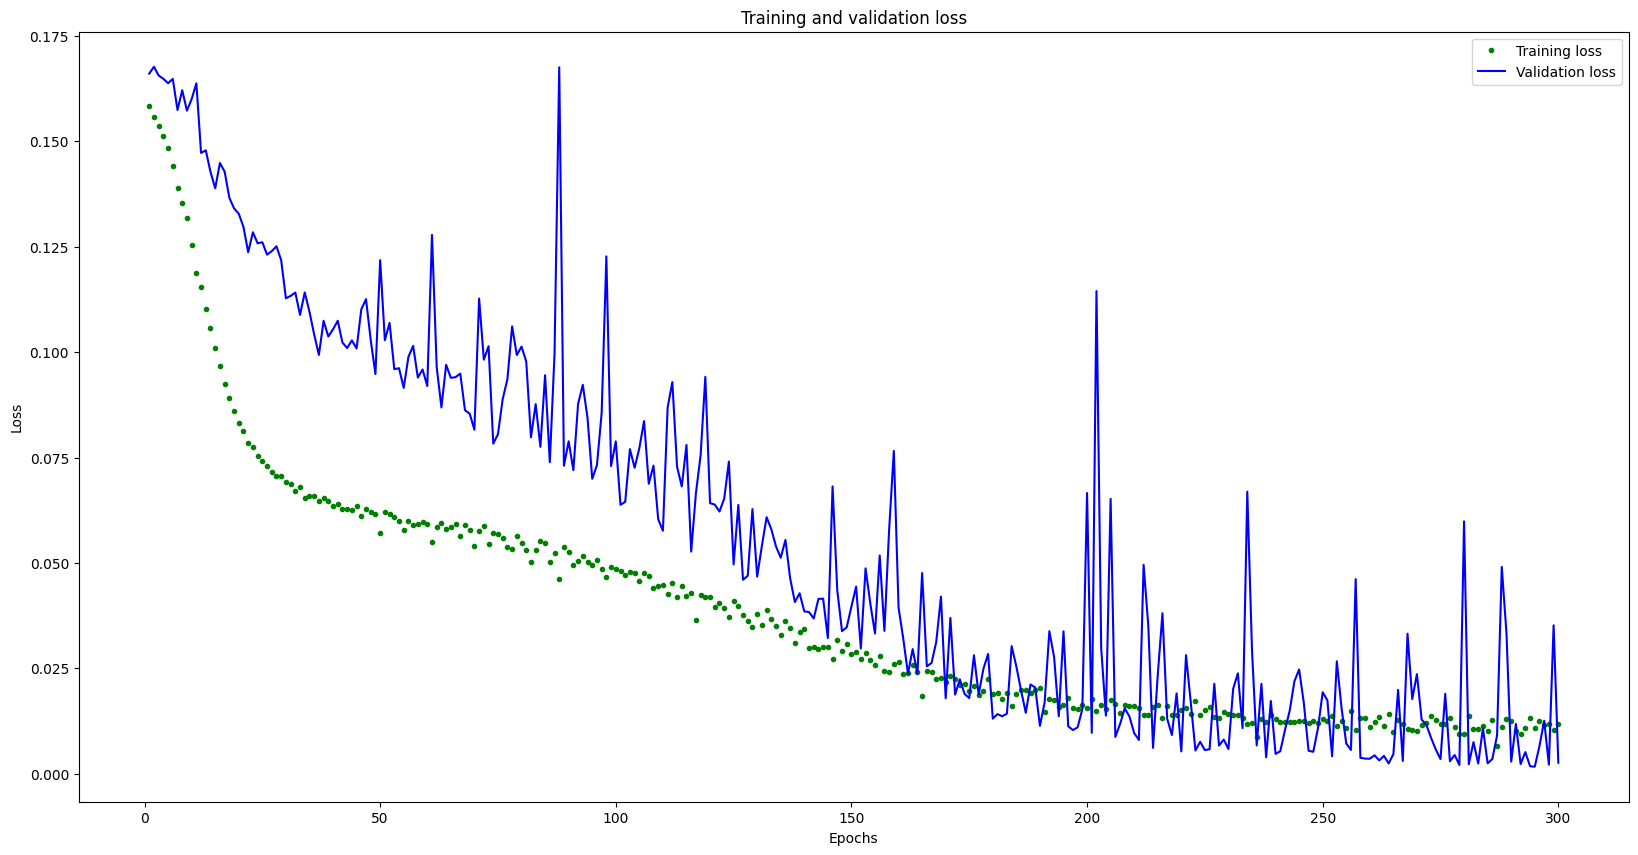

[20.0, 10.0]


In [61]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

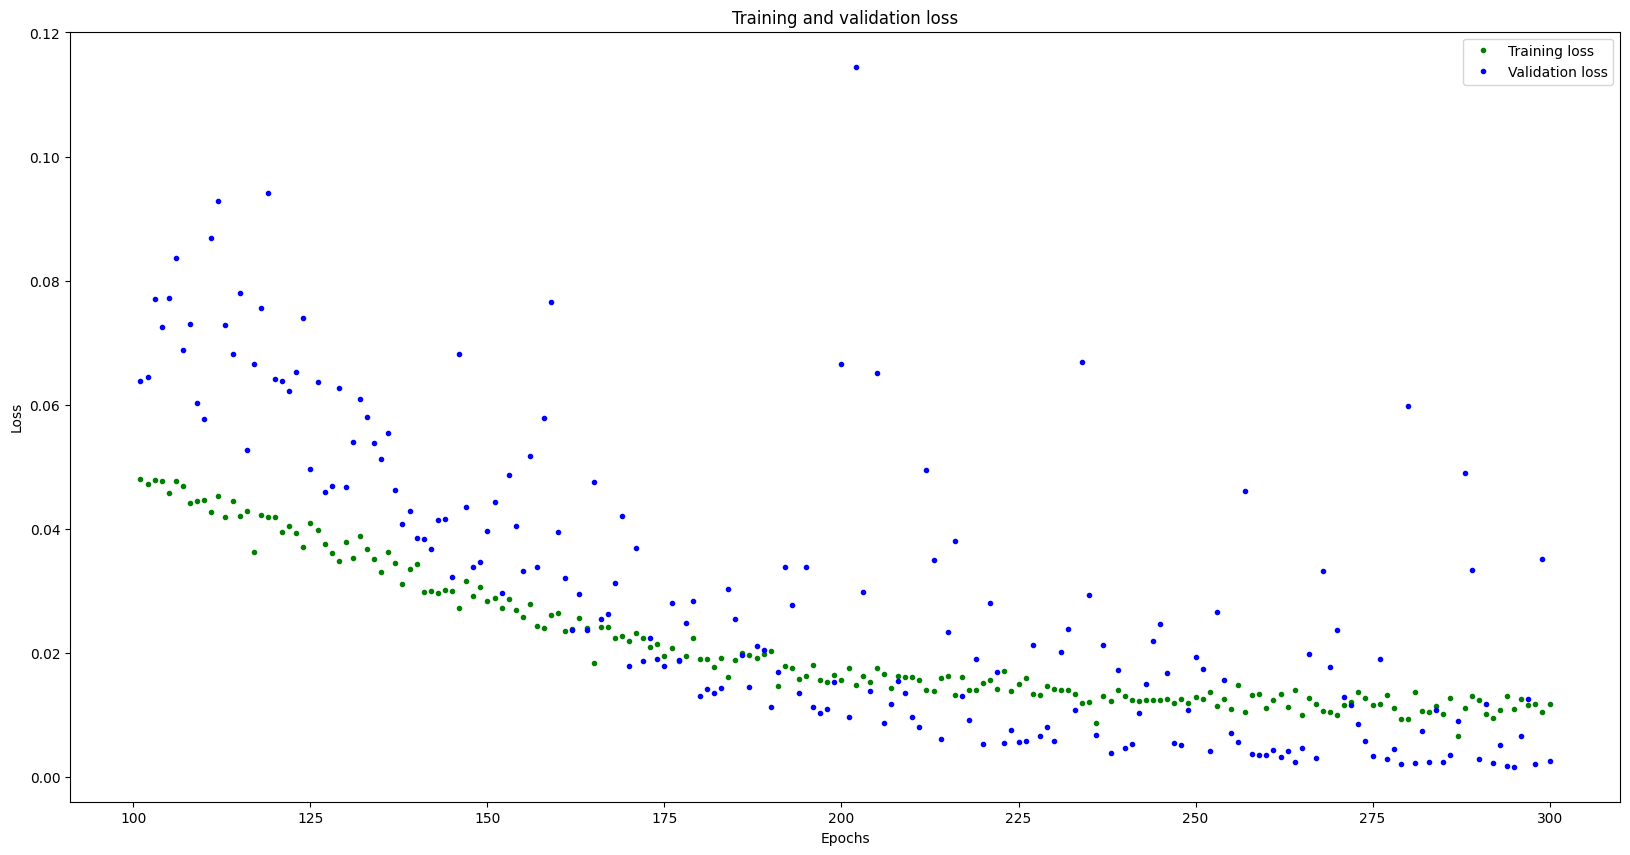

In [62]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



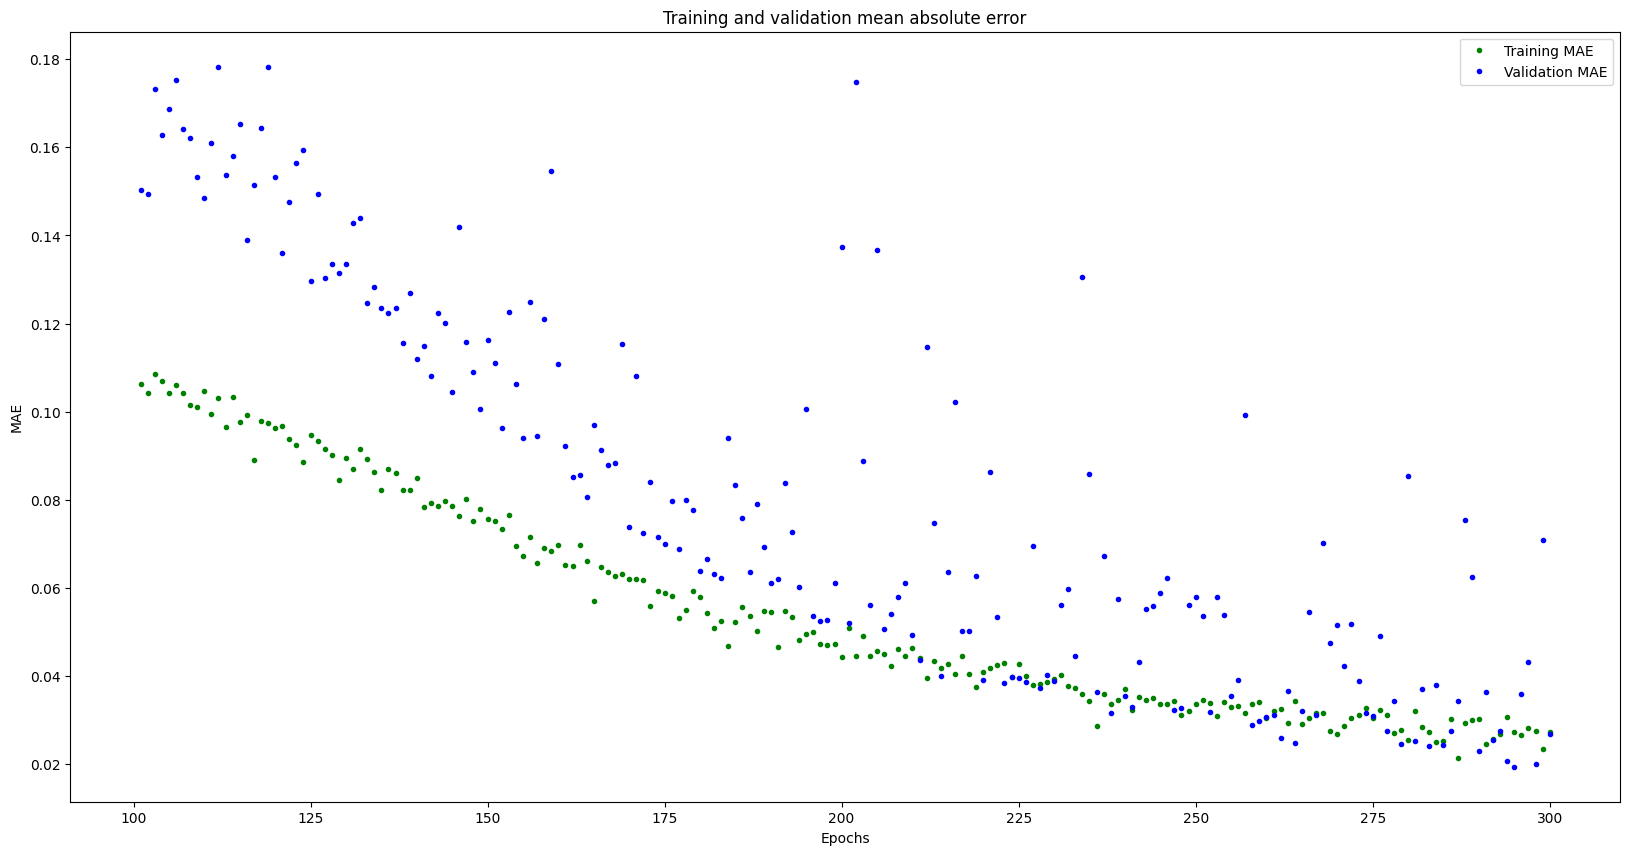

In [63]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


In [64]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# # Plot the predictions along with to the test data
# plt.clf()
# plt.title('Training data predicted vs actual values')
# #plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
# plt.plot(inputs_test, predictions, 'r.', label='Predicted')
# plt.show()

1/1 [==============================] - 0s 110ms/step
predictions =
 [[0.    0.    0.006 0.994 0.   ]
 [0.004 0.    0.295 0.701 0.   ]
 [0.805 0.    0.193 0.    0.001]
 [0.043 0.    0.898 0.06  0.   ]
 [0.041 0.    0.925 0.034 0.   ]
 [0.061 0.    0.    0.    0.939]
 [0.    0.024 0.    0.    0.976]
 [0.217 0.    0.745 0.038 0.   ]
 [0.787 0.    0.212 0.    0.001]
 [0.062 0.    0.86  0.077 0.   ]
 [0.871 0.001 0.051 0.077 0.   ]
 [0.    0.009 0.    0.    0.991]
 [0.016 0.    0.956 0.027 0.   ]
 [0.018 0.    0.949 0.033 0.   ]
 [0.017 0.    0.958 0.025 0.   ]
 [0.016 0.    0.956 0.028 0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.999 0.    0.    0.   ]
 [0.004 0.    0.35  0.647 0.   ]
 [0.96  0.001 0.024 0.015 0.   ]
 [0.02  0.    0.965 0.016 0.   ]
 [0.002 0.    0.143 0.854 0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.023 0.    0.    0.977]
 [0.959 0.001 0.027 0.013 0.   ]]
actual =
 [[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0

## Test with new data

In [65]:
# test_measure = [22977,	36106,	52788,	71216,	27235,	35036,	10490,	6381]
# test_calibrate = [26016,	46824,	82300,	80176,	42096,	53390,	19076,	13274]

# #normalize
# normalized = [0,0,0,0,0,0,0,0]
# for i in range(len(test_measure)):
#   normalized[i-1] = test_measure[i-1]/test_calibrate[i-1]

# #check quality
# if normalized[0] > TooBright:
#   print("sample too bright")
# elif normalized[0] < TooDark:
#   print("sampe too dark")

# #snv transform
# new_list = []
# mean = np.mean(normalized)
# std = np.std(normalized)
# for value in normalized:
#   new_value = (value - mean) / std
#   new_list.append(new_value)

# #predict
# predictions = model.predict([new_list])
# print("predictions =\n", np.round(predictions, decimals=3))

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [66]:
import datetime
import os

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk with the current date as the filename
current_date = datetime.datetime.now().strftime("%Y-%m-%d")
filename = f"{current_date}_gesture_model.tflite"
open(filename, "wb").write(tflite_model)

basic_model_size = os.path.getsize(filename)
print("Model is %d bytes" % basic_model_size)


Model is 13024 bytes


## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [67]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h
import os

new_filename = f"{current_date}_model.h"

os.rename("model.h", new_filename)

model_h_size = os.path.getsize(new_filename)
print(f"Header file, {new_filename}, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click {new_filename} to download the file.")

cat: gesture_model.tflite: No such file or directory
Header file, 2024-01-26_model.h, is 35 bytes.

Open the side panel (refresh if needed). Double click {new_filename} to download the file.


# meta data

In [68]:
# Create the content for the meta_data.txt file
content = f"Training date: {current_date}\n"
content += f"File trained on: {URL}\n"
content += f"PLASTICTYPES: {PLASTICTYPES}\n"
content += f"Parameters from TensorFlow training:\n"
content += f"Number of epochs: {len(loss)}\n"
content += f"Training loss: {loss}\n"
content += f"Validation loss: {val_loss}\n"
content += f"Training mean absolute error: {mae}\n"
content += f"Validation mean absolute error: {val_mae}\n"

# Write the content to the meta_data.txt file
with open(f"{current_date}_meta_data.txt", "w") as file:
    file.write(content)

def print_summary(s):
    with open(f"{current_date}_meta_data.txt",'a') as file:
        print(s, file=file)

model.summary(print_fn=print_summary)

print("meta_data.txt file created successfully.")


meta_data.txt file created successfully.
